In [58]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cv2

In [132]:
IMAGE_FOLDER = '170215_RyR-GFP30_RO_01_Serie2_SPARKS-calcium'
IMAGE_FILE_TEMPLATE = '170215_RyR-GFP30_RO_01_Serie2_z1{}_ch01.tif'

def get_image_path(idx):
    return os.path.join(IMAGE_FOLDER, IMAGE_FILE_TEMPLATE.format(str(idx).zfill(4)))

def get_image_array(idx):
    imagePath = get_image_path(idx)
    return np.array(Image.open(imagePath))

def get_spark_location(sparksDF, idx):
    candidates = sparksDF.loc[(sparksDF.loc[:,'tIni'] <= idx) & (sparksDF.loc[:, 'tFin'] >= idx), :]
    assert len(candidates) <= 1
    return candidates.loc[0, ['x', 'y']]

In [130]:
mat = loadmat('170215_RyR-GFP30_01_Serie2_Sparks.mat')['xytspark']
sparksDF = pd.DataFrame(mat, columns=['x','y','tIni','tFin'])
sparksDF.head()

,x,y,tIni,tFin
0,71,36,2,37
1,76,37,37,77
2,162,23,81,116
3,207,26,117,152
4,187,10,333,383


In [28]:
imageList = sorted(os.listdir('170215_RyR-GFP30_RO_01_Serie2_SPARKS-calcium'))
imageList

['170215_RyR-GFP30_RO_01_Serie2_z10000_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10001_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10002_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10003_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10004_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10005_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10006_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10007_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10008_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10009_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10010_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10011_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10012_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10013_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10014_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10015_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10016_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10017_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10018_ch01.tif',
 '170215_RyR-GFP30_RO_01_Serie2_z10019_ch01.tif',


In [137]:
idx = 20
im = get_image_array(idx)
im.shape

(40, 256)

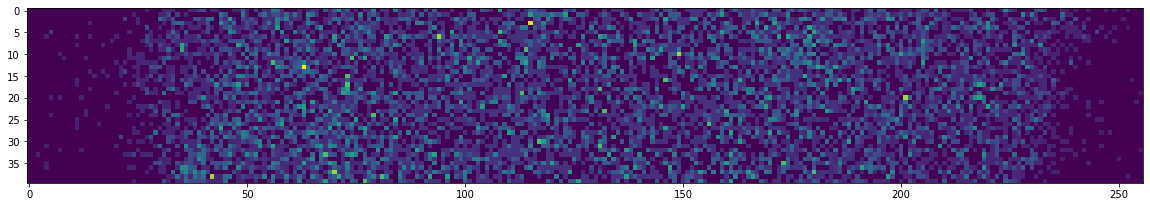

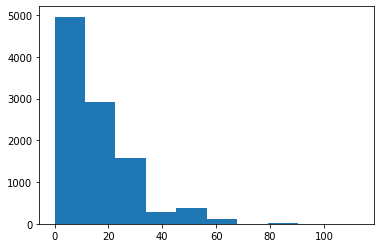

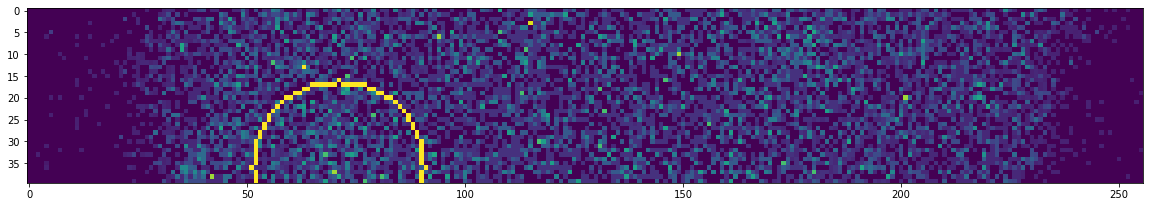

In [138]:
plt.figure(figsize=(20, 10))
plt.imshow(im)
plt.show()
plt.hist(im.flatten())
plt.show()

# find spark
im_ = im.copy()
sparkLocation = get_spark_location(sparksDF, idx)
plt.figure(figsize=(20, 10))
color = int(im_.max())
plt.imshow(cv2.circle(im_, (sparkLocation['x'], sparkLocation['y']), 20, color, thickness=1, lineType=8, shift=0))
plt.show()

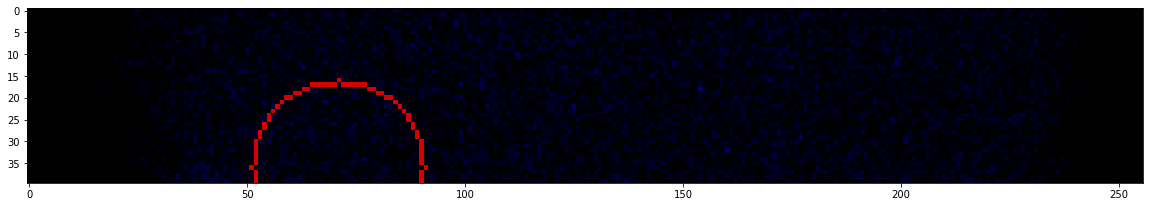

In [139]:
idx = 2
im = cv2.imread(get_image_path(idx))
parkLocation = get_spark_location(sparksDF, idx)
plt.figure(figsize=(20, 10))
color = int(im.max()*2)
plt.imshow(cv2.circle(im, (sparkLocation['x'], sparkLocation['y']), 20, color, thickness=1, lineType=8, shift=0))
plt.show()

In [146]:
idx = 553
candidates = sparksDF.loc[(sparksDF.loc[:,'tIni'] <= idx) & (sparksDF.loc[:, 'tFin'] >= idx), :]
[type(k) for i, k in candidates.iterrows()]

[pandas.core.series.Series, pandas.core.series.Series]